<a href="https://colab.research.google.com/github/Bansalpr/MNIST_Handwritten_digit_classification/blob/main/MNIST_Handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST_Handwritten_digit_classification using Deep learning

Importing the Tendencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


# Loading the MNIST Data from Keras.datasets

In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
#Shape of the numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images
Test data= 10,000 images

Image Dimensions = 28*28
Gray scale image: only one color channel

In [5]:
# printing the 10th image from images
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


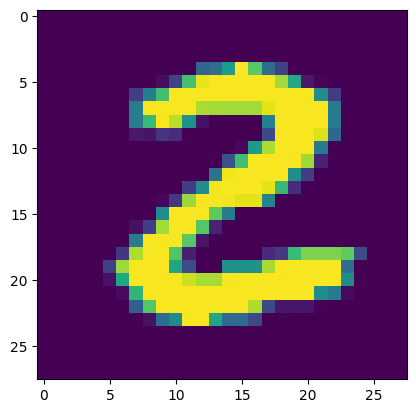

2


In [7]:
# displaying the image
plt.imshow(X_train[25])
plt.show()

# print corresponding label
print(Y_train[25])

Image lables

In [8]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [9]:
# Unique values in Y_train
print(np.unique(Y_train))

# Unique values in Y_test
print(np.unique(Y_test))



[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**We can use these labels as such or we can apply one HOT Encoding**

**All the images have the sae dimension in this dataset if not we have to resize all the images to a common dimensions**

In [10]:
# Scaling the values i.e Normalization (from range 0-255 to 0-1)

X_train=X_train/255
X_test=X_test/255

In [11]:
# printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Network**

In [12]:
# Setting up the neural network
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
                        ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# compiling the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
from os import X_OK
# Training the neural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8506 - loss: 0.5144
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9556 - loss: 0.1512
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9665 - loss: 0.1088
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9746 - loss: 0.0854
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9792 - loss: 0.0693
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9827 - loss: 0.0575
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9860 - loss: 0.0479
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9875 - loss: 0.0420
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9889 - loss: 0.0355
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9899 - loss: 0.0312


Training data accuracy is 99%

Acuuracy on Test data=96.5%

In [15]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9661 - loss: 0.1182
0.9706000089645386


In [16]:
print(X_test.shape)

(10000, 28, 28)


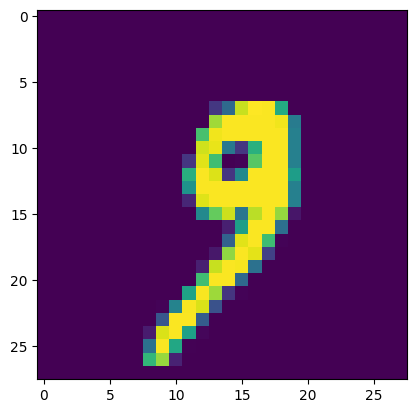

In [17]:
#Display the first data point in X_test
plt.imshow(X_test[1000])
plt.show()

In [18]:
print(Y_test[1000])

9


In [19]:
Y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[1000])

[2.9758626e-06 1.8322609e-06 1.7929015e-05 9.9539030e-01 1.2454945e-03
 3.6634002e-02 1.8856516e-15 9.0089327e-01 9.3591463e-09 9.9999702e-01]


model.predict() gives the prediction probablity of each class for that particular datapoint

In [22]:
# converting prediction prob to class label
label_for_1000_img=np.argmax(Y_pred[1000])
print(label_for_1000_img)

9


In [23]:
# converting the prediction prob to class label for all test data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 4, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test----> True labels

Y_pred_labels------>Predicted Labels

**Confusion Matrix**

In [24]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 962    0    1    1    3    3    5    0    2    3]
 [   0 1118    5    0    0    0    2    2    7    1]
 [   1    0 1008    9    2    0    3    5    4    0]
 [   1    0    2  987    2    5    0    6    2    5]
 [   1    1    2    1  960    0    5    3    0    9]
 [   2    1    0   28    3  848    2    1    4    3]
 [   3    3    1    3    8    9  930    0    1    0]
 [   1    2   10    4    0    0    0  999    2   10]
 [   2    0    8   17    8    5    1    4  922    7]
 [   0    2    0    5   12    6    0    6    6  972]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted label')

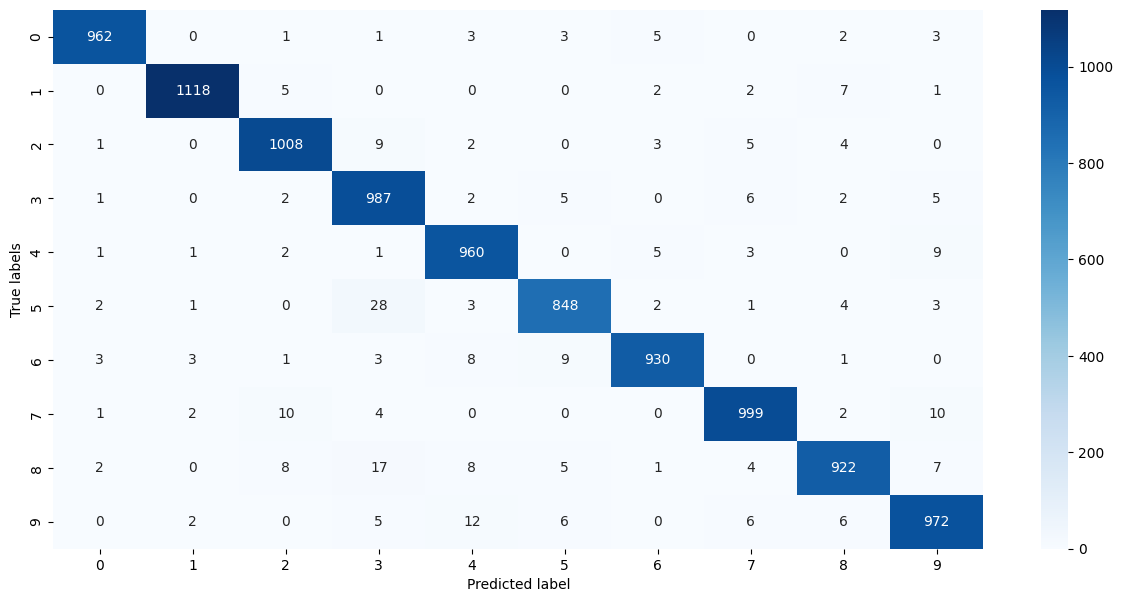

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted label')

**Building a Predictive system**

In [32]:
input_image_path='/content/Example(3).png'
input_image=cv2.imread(input_image_path)



In [33]:
type(input_image)

numpy.ndarray

In [34]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [35]:
#gray_scale_img=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [36]:
from google.colab.patches import cv2_imshow

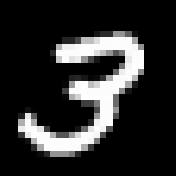

In [37]:
cv2_imshow(input_image)


In [38]:
input_image.shape

(176, 176, 3)

In [39]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [40]:
grayscale.shape

(176, 176)

In [41]:
#img=Image.open('')
img_resized=cv2.resize(grayscale,(28,28))

In [42]:
img_resized.shape

(28, 28)

In [43]:
cv2_imshow(img_resized)

In [44]:
img_resized=img_resized/255

In [45]:
image_reshaped=np.reshape(img_resized,[1,28,28])

In [46]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
[[4.3328615e-08 5.3528548e-10 2.5571572e-07 1.0000000e+00 8.2520691e-19
  6.5837038e-01 3.1763224e-14 1.4996177e-08 2.9375514e-02 6.5911748e-02]]


In [47]:
input_pred_label=np.argmax(input_prediction)

In [48]:
print(input_pred_label)

3


**Predictive system**

Path of the image to be predicted:/content/Example(3).png


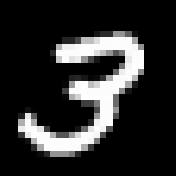

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The Handwritten Digit is recognised as  3


In [50]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)